In [6]:
import pandas as pd
import numpy as np
import re
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
from scipy import stats

%matplotlib inline
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

sys.path.append("..")
from utils.util_functions import *

In [30]:
event_df = make_df("20180101", "20181231")

In [31]:
#event_df = pd.concat([event_df, event_df[["状況"]].shift(1).rename({"状況": "状況-1"}, axis=1), event_df[["状況"]].shift(-1).rename({"状況": "状況+1"}, axis=1)], axis=1)

In [39]:
def extract_case(event_df, before_2, before_1):
    con_event_df = pd.concat([event_df, event_df[["状況"]].shift(1).rename({"状況": "状況-1"}, axis=1), event_df[["状況"]].shift(2).rename({"状況": "状況-2"}, axis=1)], axis=1)
    return con_event_df[(con_event_df["状況-1"]==before_1) & (con_event_df["状況-2"]==before_2)]

In [86]:
def make_triple_from_case(con_event_df):
    return [list(reversed(elem)) for elem in con_event_df[["状況", "状況-1", "状況-2"]].values.tolist()]

In [88]:
ad_list = make_triple_from_case(extract_case(event_df, "1000", "1100"))
dis_list = make_triple_from_case(extract_case(event_df, "0100", "1100"))

In [57]:
counter = Counter(extract_case(event_df, "1000", "2000").状況.values)

In [65]:
counter

Counter({'0000': 6,
         '0010': 1,
         '0100': 3,
         '2000': 197,
         '2001': 43,
         '2010': 489,
         '2100': 1718,
         '3000': 5339,
         'GAMESET': 1})

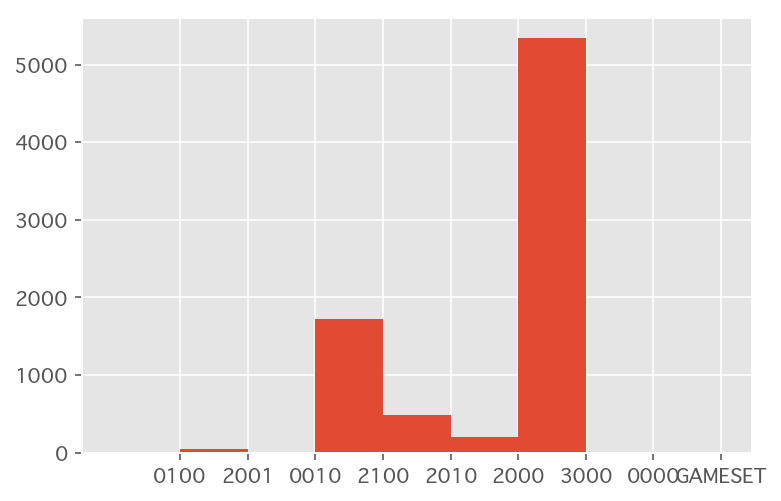

In [64]:
labels, values = zip(*counter.items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()